In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squidpy as sq

adata = sc.read_h5ad('/home/renpf/benchmark/data/data/nanostring/COAD_filter.h5ad')

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


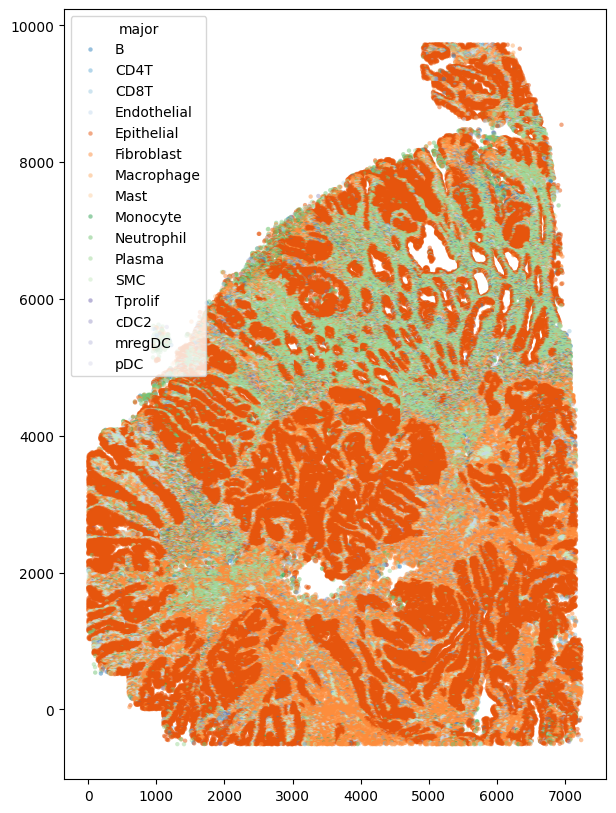

In [2]:
x = adata.obsm['spatial'][:, 0]
y = adata.obsm['spatial'][:, 1]
v = adata.obs['major']
plt.figure(figsize=((np.max(x) - np.min(x)) // 1000, (np.max(y) - np.min(y)) // 1000))
sns.scatterplot(x=x, y=y, hue=v, alpha=0.5, s=10, palette='tab20c', legend=True, edgecolor='none')
plt.show()

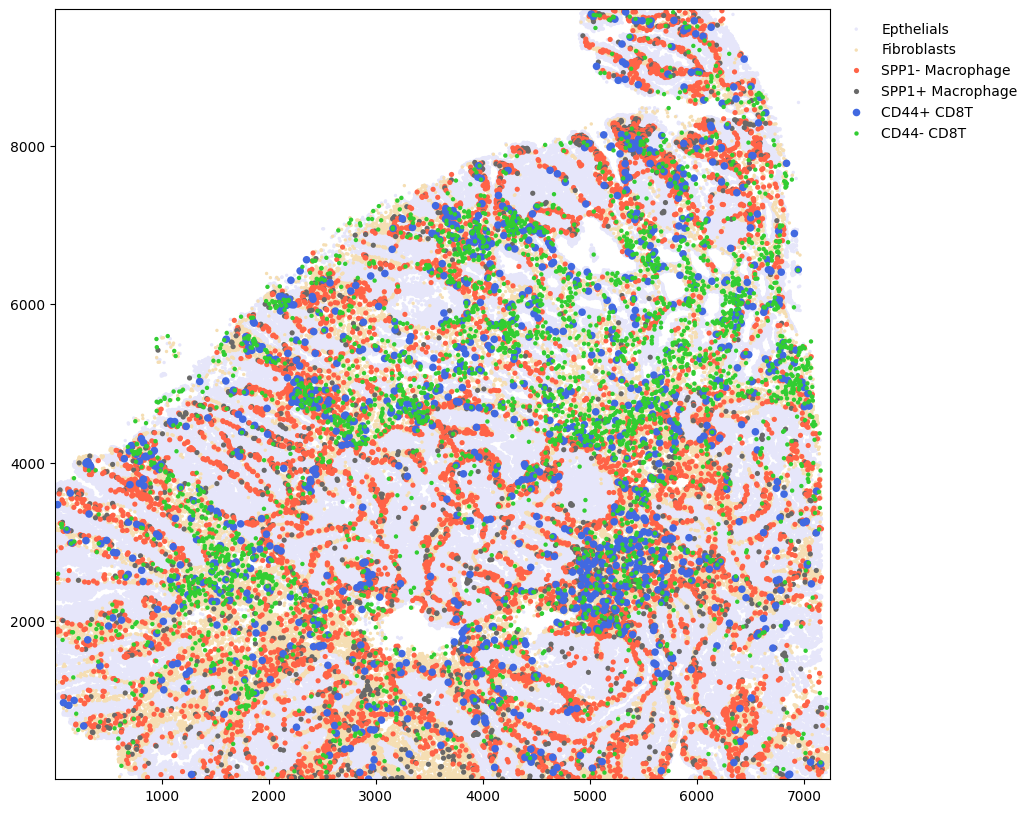

In [14]:
region_1 = [[0, 30000], [0, 30000]]
plot_data = adata[(adata.obsm['spatial'][:, 0] > region_1[0][0]) & (adata.obsm['spatial'][:, 0] < region_1[0][1]) &
                  (adata.obsm['spatial'][:, 1] > region_1[1][0]) & (adata.obsm['spatial'][:, 1] < region_1[1][1])]

x = plot_data.obsm['spatial'][:, 0]
y = plot_data.obsm['spatial'][:, 1]
v = plot_data.obs['major']
spp1 = plot_data[:, 'SPP1'].X.toarray().flatten()
cd44 = plot_data[:, 'CD44'].X.toarray().flatten()
plot_df = pd.DataFrame({'x': x, 'y': y, 'v': v, 'spp1': spp1, 'cd44': cd44})
plot_df['spp1_macro'] = plot_df.spp1.map(lambda x: 'SPP1+ Macrophage' if x > 0 else 'SPP1- Macrophage')
plot_df['spp1_mag'] = plot_df.spp1.map(lambda x: 'SPP1+ Malignant' if x > 0 else 'SPP1- Malignant')
plot_df['cd44'] = plot_df.cd44.map(lambda x: 'CD44+ CD8T' if x > 0 else 'CD44- CD8T')
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x', y='y', label='Epthelials', data=plot_df[(plot_df.v == 'Epithelial')], alpha=1, s=6, color=['lavender'], legend=True, edgecolor='none')
sns.scatterplot(x='x', y='y', label='Fibroblasts', data=plot_df[(plot_df.v == 'Fibroblast')], alpha=1, s=6, color=['wheat'], legend=True, edgecolor='none')
sns.scatterplot(x='x', y='y', hue='spp1_macro', data=plot_df[(plot_df.v == 'Macrophage')], alpha=1, s=14, palette=['tomato', 'dimgray'], legend=True, edgecolor='none')
# sns.scatterplot(x='x', y='y', hue='spp1_mag', data=plot_df[plot_df.v == 'Epithelial'], alpha=1, s=10, palette=['tan', 'violet'], legend=True, edgecolor='none')
sns.scatterplot(x='x', y='y', hue='cd44', data=plot_df[(plot_df.v == 'CD8T') & (plot_df.cd44 == 'CD44+ CD8T')], alpha=1, s=30, palette=['royalblue'], legend=True, edgecolor='none')
sns.scatterplot(x='x', y='y', hue='cd44', data=plot_df[(plot_df.v == 'CD8T') & (plot_df.cd44 == 'CD44- CD8T')], alpha=1, s=10, palette=['limegreen'], legend=True, edgecolor='none')
plt.ylim(np.min(y), np.max(y))
plt.xlim(np.min(x), np.max(x))
plt.legend(frameon=False, fontsize=10, bbox_to_anchor=(1, 1), loc='upper left')
# plt.xticks([])
plt.xlabel('')
# plt.yticks([])
plt.ylabel('')
# plt.rcParams['pdf.fonttype']=42
# plt.savefig("./plots/nanostring_cd44_neg_celltype.pdf", format="pdf", bbox_inches='tight')
plt.show()


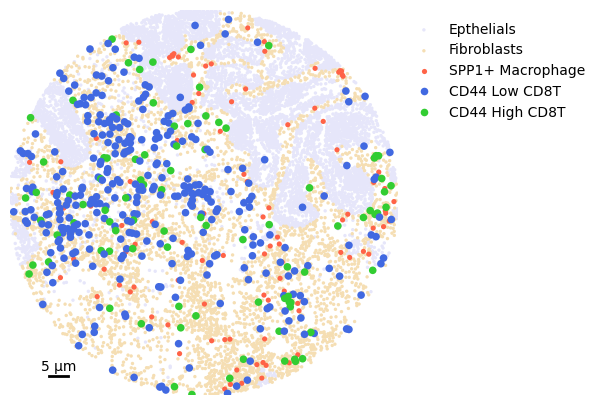

In [23]:
# calculate the bins in adata whose distance to region center is less than 1000
region_center = [2000, 2500]

from scipy.spatial import distance_matrix
distance_matrix = distance_matrix(adata.obsm['spatial'], [region_center])
distance_matrix = distance_matrix < 1000
plot_data = adata[distance_matrix.reshape(1, -1)[0]]

x = plot_data.obsm['spatial'][:, 0]
y = plot_data.obsm['spatial'][:, 1]
v = plot_data.obs['major']
spp1 = plot_data[:, 'SPP1'].X.toarray().flatten()
cd44 = plot_data[:, 'CD44'].X.toarray().flatten()
plot_df = pd.DataFrame({'x': x, 'y': y, 'v': v, 'spp1': spp1, 'cd44': cd44})
plot_df['spp1_macro'] = plot_df.spp1.map(lambda x: 'SPP1+ Macrophage' if x > 0 else 'SPP1- Macrophage')
plot_df['spp1_mag'] = plot_df.spp1.map(lambda x: 'SPP1+ Malignant' if x > 0 else 'SPP1- Malignant')
plot_df['cd44'] = plot_df.cd44.map(lambda x: 'CD44 High CD8T' if x > 0 else 'CD44 Low CD8T')
plt.figure(figsize=(5, 5))
sns.scatterplot(x='x', y='y', label='Epthelials', data=plot_df[(plot_df.v == 'Epithelial')], alpha=1, s=6, color=['lavender'], legend=True, edgecolor='none')
sns.scatterplot(x='x', y='y', label='Fibroblasts', data=plot_df[(plot_df.v == 'Fibroblast')], alpha=1, s=6, color=['wheat'], legend=True, edgecolor='none')
sns.scatterplot(x='x', y='y', hue='spp1_macro', data=plot_df[(plot_df.v == 'Macrophage') & (plot_df.spp1_macro == 'SPP1+ Macrophage')], alpha=1, s=14, palette=['tomato'], legend=True, edgecolor='none')
# sns.scatterplot(x='x', y='y', hue='spp1_mag', data=plot_df[plot_df.v == 'Epithelial'], alpha=1, s=10, palette=['tan', 'violet'], legend=True, edgecolor='none')
sns.scatterplot(x='x', y='y', hue='cd44', data=plot_df[(plot_df.v == 'CD8T')], alpha=1, s=30, palette=['royalblue', 'limegreen'], legend=True, edgecolor='none')
plt.ylim(np.min(y), np.max(y))
plt.xlim(np.min(x), np.max(x))
plt.legend(frameon=False, fontsize=10, bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks([])
plt.xlabel('')
plt.yticks([])
plt.ylabel('')

# Add scale bar
bar_length = 100  # 1 unit = 500um
bar_x = np.min(x) + (np.max(x) - np.min(x)) * 0.1  # Position at 10% from left
bar_y = np.min(y) + (np.max(y) - np.min(y)) * 0.05  # Position at 10% from bottom
plt.plot([bar_x, bar_x + bar_length], [bar_y, bar_y], 'k-', linewidth=2)
plt.text(bar_x + bar_length/2, bar_y + 10, '5 μm', ha='center', va='bottom', fontsize=10)

sns.despine(left=True, bottom=True)
plot_df_neg = plot_df.copy()
plt.show()

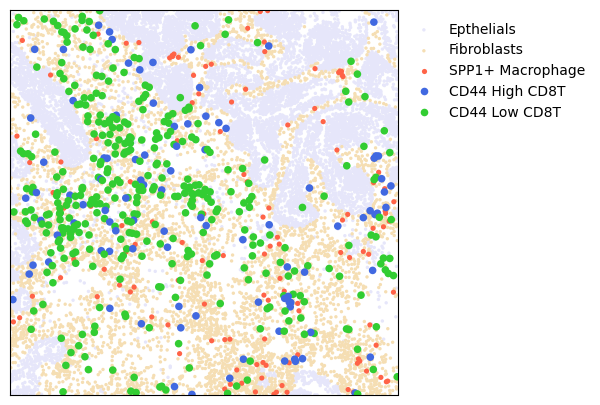

In [3]:
region_1 = [[1000, 3000], [1500, 3500]]
plot_data = adata[(adata.obsm['spatial'][:, 0] > region_1[0][0]) & (adata.obsm['spatial'][:, 0] < region_1[0][1]) &
                  (adata.obsm['spatial'][:, 1] > region_1[1][0]) & (adata.obsm['spatial'][:, 1] < region_1[1][1])]

x = plot_data.obsm['spatial'][:, 0]
y = plot_data.obsm['spatial'][:, 1]
v = plot_data.obs['major']
spp1 = plot_data[:, 'SPP1'].X.toarray().flatten()
cd44 = plot_data[:, 'CD44'].X.toarray().flatten()
plot_df = pd.DataFrame({'x': x, 'y': y, 'v': v, 'spp1': spp1, 'cd44': cd44})
plot_df['spp1_macro'] = plot_df.spp1.map(lambda x: 'SPP1+ Macrophage' if x > 0 else 'SPP1- Macrophage')
plot_df['spp1_mag'] = plot_df.spp1.map(lambda x: 'SPP1+ Malignant' if x > 0 else 'SPP1- Malignant')
plot_df['cd44'] = plot_df.cd44.map(lambda x: 'CD44 High CD8T' if x > 0 else 'CD44 Low CD8T')
plt.figure(figsize=(5, 5))
sns.scatterplot(x='x', y='y', label='Epthelials', data=plot_df[(plot_df.v == 'Epithelial')], alpha=1, s=6, color=['lavender'], legend=True, edgecolor='none')
sns.scatterplot(x='x', y='y', label='Fibroblasts', data=plot_df[(plot_df.v == 'Fibroblast')], alpha=1, s=6, color=['wheat'], legend=True, edgecolor='none')
sns.scatterplot(x='x', y='y', hue='spp1_macro', data=plot_df[(plot_df.v == 'Macrophage') & (plot_df.spp1_macro == 'SPP1+ Macrophage')], alpha=1, s=14, palette=['tomato'], legend=True, edgecolor='none')
# sns.scatterplot(x='x', y='y', hue='spp1_mag', data=plot_df[plot_df.v == 'Epithelial'], alpha=1, s=10, palette=['tan', 'violet'], legend=True, edgecolor='none')
sns.scatterplot(x='x', y='y', hue='cd44', data=plot_df[(plot_df.v == 'CD8T')], alpha=1, s=30, palette=['royalblue', 'limegreen'], legend=True, edgecolor='none')
plt.ylim(np.min(y), np.max(y))
plt.xlim(np.min(x), np.max(x))
plt.legend(frameon=False, fontsize=10, bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks([])
plt.xlabel('')
plt.yticks([])
plt.ylabel('')
plt.rcParams['pdf.fonttype']=42
plt.savefig("./plots/nanostring_cd44_neg_celltype.pdf", format="pdf", bbox_inches='tight')
plot_df_neg = plot_df.copy()
plt.show()


In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# 定义范围
radius = 20

# 计算每个SPP1+的Macrophage一定范围内含有CD44+的CD8T的占所有的CD8T里的proportion
def calculate_proportion(spp1_macro, cd44_pos, cd44_neg, radius):
    proportions = []
    for _, row in spp1_macro.iterrows():
        x, y = row['x'], row['y']
        # 计算在范围内的CD44+ CD8T
        in_radius_pos = cd44_pos[(np.sqrt((cd44_pos['x'] - x) ** 2 + (cd44_pos['y'] - y) ** 2) <= radius)]
        in_radius_neg = cd44_neg[(np.sqrt((cd44_neg['x'] - x) ** 2 + (cd44_neg['y'] - y) ** 2) <= radius)]
        proportion = len(in_radius_pos) / (len(in_radius_pos) + len(in_radius_neg))
        proportions.append(proportion)
    return proportions

# 获取CD44+的CD8T细胞
cd44_pos = plot_df[plot_df['cd44'] == 'CD44 High CD8T']
cd44_neg = plot_df[plot_df['cd44'] == 'CD44 Low CD8T']
# 获取SPP1+的Macrophage
spp1_pos_macro = plot_df[plot_df['spp1_macro'] == 'SPP1+ Macrophage']
spp1_neg_macro = plot_df[plot_df['spp1_macro'] == 'SPP1- Macrophage']

# 计算proportion
spp1_pos_macro_proportions = calculate_proportion(spp1_pos_macro, cd44_pos, cd44_neg, radius)
spp1_neg_macro_proportions = calculate_proportion(spp1_neg_macro, cd44_pos, cd44_neg, radius)

# 创建DataFrame用于绘图
proportion_df = pd.DataFrame({
    'length': spp1_pos_macro_proportions + spp1_neg_macro_proportions,
    'type': ['SPP1+ Macrophage'] * len(spp1_pos_macro_proportions) + ['SPP1- Macrophage'] * len(spp1_neg_macro_proportions)
})

t_p = ttest_ind(spp1_pos_macro_proportions, spp1_neg_macro_proportions)
print(t_p)

TtestResult(statistic=2.793294080089187, pvalue=0.005222191413852749, df=20801.0)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_29176/2672870378.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot([-0.1, 0.1], [means[0], means[0]], color='silver', linestyle='-', linewidth=2)
/tmp/ipykernel_29176/2672870378.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot([0.9, 1.1], [means[1], means[1]], color='silver', linestyle='-', linewidth=2)


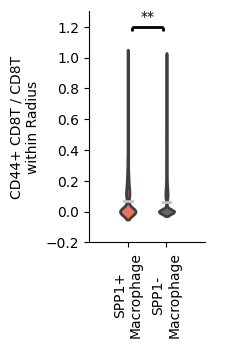

In [32]:
# 绘制左一半和右一半的violinplot，并去除Box
plt.figure(figsize=(1.5, 3))
sns.violinplot(data=proportion_df, y='length', hue='type', width=0.4, palette=['tomato', 'dimgray'], linewidth=2, x='type', split=False, inner=None)
plt.ylabel('CD44+ CD8T / CD8T\nwithin Radius')
plt.xlabel('')
plt.xticks([0, 1], ['SPP1+\nMacrophage', 'SPP1-\nMacrophage'], rotation=90, ha='center', fontsize=10)
# plt.title('Proportion of CD44+ CD8T within Radius of SPP1+ Macrophage')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
sns.despine(left=False, bottom=False)

# 用白色的线标出平均值
means = proportion_df.groupby('type')['length'].mean()

plt.plot([-0.1, 0.1], [means[0], means[0]], color='silver', linestyle='-', linewidth=2)
plt.plot([0.9, 1.1], [means[1], means[1]], color='silver', linestyle='-', linewidth=2)

plt.vlines(0.9, 1.17, 1.2, color='black', linestyle='-', linewidth=2)
plt.vlines(0.1, 1.17, 1.2, color='black', linestyle='-', linewidth=2)
plt.hlines(1.2, 0.1, 0.9, color='black', linestyle='-', linewidth=2)
plt.text(0.5, 1.22, '**', ha='center', va='bottom', fontsize=10)
plt.xlim(-1, 2)
plt.ylim(-0.2, 1.3)

plt.rcParams['pdf.fonttype']=42
plt.savefig("./plots/nanostring_cd44_neg_celltype_proportion.pdf", format="pdf", bbox_inches='tight')
plt.show()


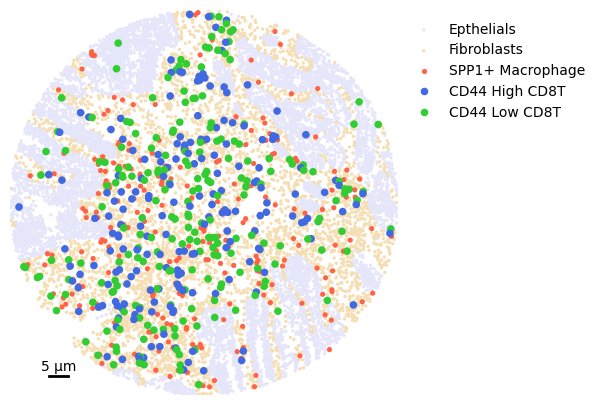

In [24]:
# calculate the bins in adata whose distance to region center is less than 1000
region_center = [5400, 2700]

from scipy.spatial import distance_matrix
distance_matrix = distance_matrix(adata.obsm['spatial'], [region_center])
distance_matrix = distance_matrix < 1000
plot_data = adata[distance_matrix.reshape(1, -1)[0]]

x = plot_data.obsm['spatial'][:, 0]
y = plot_data.obsm['spatial'][:, 1]
v = plot_data.obs['major']
spp1 = plot_data[:, 'SPP1'].X.toarray().flatten()
cd44 = plot_data[:, 'CD44'].X.toarray().flatten()
plot_df = pd.DataFrame({'x': x, 'y': y, 'v': v, 'spp1': spp1, 'cd44': cd44})
plot_df['spp1_macro'] = plot_df.spp1.map(lambda x: 'SPP1+ Macrophage' if x > 0 else 'SPP1- Macrophage')
plot_df['spp1_mag'] = plot_df.spp1.map(lambda x: 'SPP1+ Malignant' if x > 0 else 'SPP1- Malignant')
plot_df['cd44'] = plot_df.cd44.map(lambda x: 'CD44 High CD8T' if x > 0 else 'CD44 Low CD8T')
plt.figure(figsize=(5, 5))
sns.scatterplot(x='x', y='y', label='Epthelials', data=plot_df[(plot_df.v == 'Epithelial')], alpha=1, s=6, color=['lavender'], legend=True, edgecolor='none')
sns.scatterplot(x='x', y='y', label='Fibroblasts', data=plot_df[(plot_df.v == 'Fibroblast')], alpha=1, s=6, color=['wheat'], legend=True, edgecolor='none')
sns.scatterplot(x='x', y='y', hue='spp1_macro', data=plot_df[(plot_df.v == 'Macrophage') & (plot_df.spp1_macro == 'SPP1+ Macrophage')], alpha=1, s=14, palette=['tomato'], legend=True, edgecolor='none')
# sns.scatterplot(x='x', y='y', hue='spp1_mag', data=plot_df[plot_df.v == 'Epithelial'], alpha=1, s=10, palette=['tan', 'violet'], legend=True, edgecolor='none')
sns.scatterplot(x='x', y='y', hue='cd44', data=plot_df[(plot_df.v == 'CD8T')], alpha=1, s=30, palette=['royalblue', 'limegreen'], legend=True, edgecolor='none')
plt.ylim(np.min(y), np.max(y))
plt.xlim(np.min(x), np.max(x))
plt.legend(frameon=False, fontsize=10, bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks([])
plt.xlabel('')
plt.yticks([])
plt.ylabel('')

# Add scale bar
bar_length = 100  # 1 unit = 500um
bar_x = np.min(x) + (np.max(x) - np.min(x)) * 0.1  # Position at 10% from left
bar_y = np.min(y) + (np.max(y) - np.min(y)) * 0.05  # Position at 10% from bottom
plt.plot([bar_x, bar_x + bar_length], [bar_y, bar_y], 'k-', linewidth=2)
plt.text(bar_x + bar_length/2, bar_y + 10, '5 μm', ha='center', va='bottom', fontsize=10)

sns.despine(left=True, bottom=True)
plot_df_neg = plot_df.copy()
plt.show()

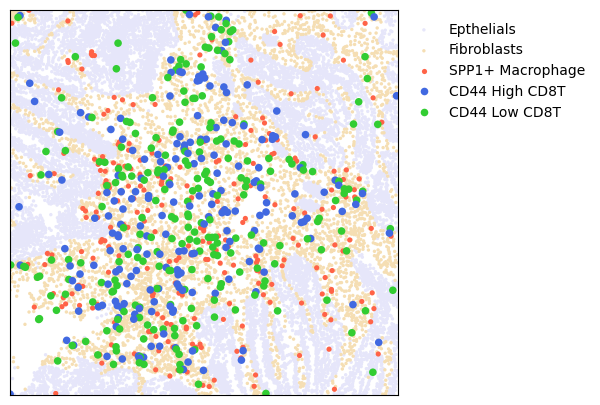

In [4]:
region_2 = [[4400, 6400], [1700, 3700]]
plot_data = adata[(adata.obsm['spatial'][:, 0] > region_2[0][0]) & (adata.obsm['spatial'][:, 0] < region_2[0][1]) &
                  (adata.obsm['spatial'][:, 1] > region_2[1][0]) & (adata.obsm['spatial'][:, 1] < region_2[1][1])]

x = plot_data.obsm['spatial'][:, 0]
y = plot_data.obsm['spatial'][:, 1]
v = plot_data.obs['major']
spp1 = plot_data[:, 'SPP1'].X.toarray().flatten()
cd44 = plot_data[:, 'CD44'].X.toarray().flatten()
plot_df = pd.DataFrame({'x': x, 'y': y, 'v': v, 'spp1': spp1, 'cd44': cd44})
plot_df['spp1_macro'] = plot_df.spp1.map(lambda x: 'SPP1+ Macrophage' if x > 0 else 'SPP1- Macrophage')
plot_df['spp1_mag'] = plot_df.spp1.map(lambda x: 'SPP1+ Malignant' if x > 0 else 'SPP1- Malignant')
plot_df['cd44'] = plot_df.cd44.map(lambda x: 'CD44 High CD8T' if x > 0 else 'CD44 Low CD8T')
plt.figure(figsize=(5, 5))
sns.scatterplot(x='x', y='y', label='Epthelials', data=plot_df[(plot_df.v == 'Epithelial')], alpha=1, s=6, color=['lavender'], legend=True, edgecolor='none')
sns.scatterplot(x='x', y='y', label='Fibroblasts', data=plot_df[(plot_df.v == 'Fibroblast')], alpha=1, s=6, color=['wheat'], legend=True, edgecolor='none')
# sns.scatterplot(x='x', y='y', hue='spp1_macro', data=plot_df[plot_df.v == 'Macrophage'], alpha=1, s=14, palette=['tomato', 'dimgray'], legend=True, edgecolor='none')
sns.scatterplot(x='x', y='y', hue='spp1_macro', data=plot_df[(plot_df.v == 'Macrophage') & (plot_df.spp1_macro == 'SPP1+ Macrophage')], alpha=1, s=14, palette=['tomato'], legend=True, edgecolor='none')
# sns.scatterplot(x='x', y='y', hue='spp1_mag', data=plot_df[plot_df.v == 'Epithelial'], alpha=1, s=10, palette=['tan', 'violet'], legend=True, edgecolor='none')
sns.scatterplot(x='x', y='y', hue='cd44', data=plot_df[(plot_df.v == 'CD8T')], alpha=1, s=30, palette=['royalblue', 'limegreen'], legend=True, edgecolor='none')
plt.ylim(np.min(y), np.max(y))
plt.xlim(np.min(x), np.max(x))
plt.legend(frameon=False, fontsize=10, bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks([])
plt.xlabel('')
plt.yticks([])
plt.ylabel('')
plt.rcParams['pdf.fonttype']=42
plt.savefig("./plots/nanostring_cd44_pos_celltype.pdf", format="pdf", bbox_inches='tight')
plot_df_pos = plot_df.copy()
plt.show()


In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# 定义范围
radius = 20

# 计算每个SPP1+的Macrophage一定范围内含有CD44+的CD8T的占所有的CD8T里的proportion
def calculate_proportion(spp1_macro, cd44_pos, cd44_neg, radius):
    proportions = []
    for _, row in spp1_macro.iterrows():
        x, y = row['x'], row['y']
        # 计算在范围内的CD44+ CD8T
        in_radius_pos = cd44_pos[(np.sqrt((cd44_pos['x'] - x) ** 2 + (cd44_pos['y'] - y) ** 2) <= radius)]
        in_radius_neg = cd44_neg[(np.sqrt((cd44_neg['x'] - x) ** 2 + (cd44_neg['y'] - y) ** 2) <= radius)]
        proportion = len(in_radius_pos) / (len(in_radius_pos) + len(in_radius_neg))
        proportions.append(proportion)
    return proportions

# 获取CD44+的CD8T细胞
cd44_pos = plot_df[plot_df['cd44'] == 'CD44+ CD8T']
cd44_neg = plot_df[plot_df['cd44'] == 'CD44- CD8T']
# 获取SPP1+的Macrophage
spp1_pos_macro = plot_df[plot_df['spp1_macro'] == 'SPP1+ Macrophage']
spp1_neg_macro = plot_df[plot_df['spp1_macro'] == 'SPP1- Macrophage']

# 计算proportion
spp1_pos_macro_proportions = calculate_proportion(spp1_pos_macro, cd44_pos, cd44_neg, radius)
spp1_neg_macro_proportions = calculate_proportion(spp1_neg_macro, cd44_pos, cd44_neg, radius)

# 创建DataFrame用于绘图
proportion_df = pd.DataFrame({
    'length': spp1_pos_macro_proportions + spp1_neg_macro_proportions,
    'type': ['SPP1+ Macrophage'] * len(spp1_pos_macro_proportions) + ['SPP1- Macrophage'] * len(spp1_neg_macro_proportions)
})

t_p = ttest_ind(spp1_pos_macro_proportions, spp1_neg_macro_proportions)
print(t_p)

TtestResult(statistic=6.355588748176193, pvalue=2.126808046667307e-10, df=17776.0)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_29176/209579584.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot([-0.1, 0.1], [means[0], means[0]], color='silver', linestyle='-', linewidth=2)
/tmp/ipykernel_29176/209579584.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot([0.9, 1.1], [means[1], means[1]], color='silver', linestyle='-', linewidth=2)


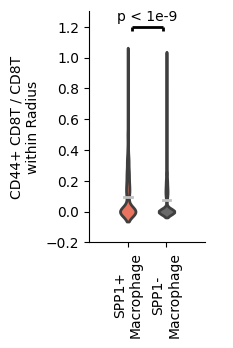

In [37]:
# 绘制左一半和右一半的violinplot，并去除Box
plt.figure(figsize=(1.5, 3))
sns.violinplot(data=proportion_df, y='length', hue='type', width=0.4, palette=['tomato', 'dimgray'], linewidth=2, x='type', split=False, inner=None)
plt.ylabel('CD44+ CD8T / CD8T\nwithin Radius')
plt.xlabel('')
plt.xticks([0, 1], ['SPP1+\nMacrophage', 'SPP1-\nMacrophage'], rotation=90, ha='center', fontsize=10)
# plt.title('Proportion of CD44+ CD8T within Radius of SPP1+ Macrophage')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
sns.despine(left=False, bottom=False)

# 用白色的线标出平均值
means = proportion_df.groupby('type')['length'].mean()

plt.plot([-0.1, 0.1], [means[0], means[0]], color='silver', linestyle='-', linewidth=2)
plt.plot([0.9, 1.1], [means[1], means[1]], color='silver', linestyle='-', linewidth=2)

plt.vlines(0.9, 1.17, 1.2, color='black', linestyle='-', linewidth=2)
plt.vlines(0.1, 1.17, 1.2, color='black', linestyle='-', linewidth=2)
plt.hlines(1.2, 0.1, 0.9, color='black', linestyle='-', linewidth=2)
plt.text(0.5, 1.22, 'p < 1e-9', ha='center', va='bottom', fontsize=10)
plt.xlim(-1, 2)
plt.ylim(-0.2, 1.3)

plt.rcParams['pdf.fonttype']=42
plt.savefig("./plots/nanostring_cd44_pos_celltype_proportion.pdf", format="pdf", bbox_inches='tight')
plt.show()


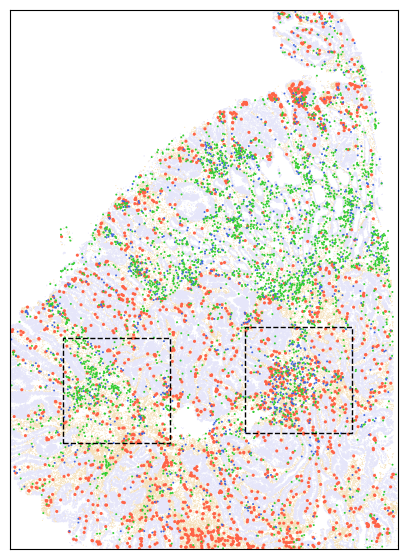

In [6]:
x = adata.obsm['spatial'][:, 0]
y = adata.obsm['spatial'][:, 1]
v = adata.obs['major']
spp1 = adata[:, 'SPP1'].X.toarray().flatten()
cd44 = adata[:, 'CD44'].X.toarray().flatten()
plot_df = pd.DataFrame({'x': x, 'y': y, 'v': v, 'spp1': spp1, 'cd44': cd44})
plot_df['spp1_macro'] = plot_df.spp1.map(lambda x: 'SPP1+ Macrophage' if x > 0 else 'SPP1- Macrophage')
plot_df['spp1_mag'] = plot_df.spp1.map(lambda x: 'SPP1+ Malignant' if x > 0 else 'SPP1- Malignant')
plot_df['cd44'] = plot_df.cd44.map(lambda x: 'CD44+ CD8T' if x > 0 else 'CD44- CD8T')
plt.figure(figsize=((np.max(x) - np.min(x)) // 1300, (np.max(y) - np.min(y)) // 1300))
sns.scatterplot(x='x', y='y', label='Epthelials', data=plot_df[(plot_df.v == 'Epithelial')], alpha=1, s=0.5, color=['lavender'], legend=False, edgecolor='none')
sns.scatterplot(x='x', y='y', label='Fibroblasts', data=plot_df[(plot_df.v == 'Fibroblast')], alpha=1, s=0.5, color=['wheat'], legend=False, edgecolor='none')
sns.scatterplot(x='x', y='y', hue='spp1_macro', data=plot_df[(plot_df.v == 'Macrophage') & (plot_df.spp1_macro == 'SPP1+ Macrophage')], alpha=1, s=5, palette=['tomato'], legend=False, edgecolor='none')
# sns.scatterplot(x='x', y='y', hue='spp1_macro', data=plot_df[(plot_df.v == 'Macrophage') & (plot_df.spp1_macro == 'SPP1- Macrophage')], alpha=1, s=5, palette=['dimgray'], legend=False, edgecolor='none')
# sns.scatterplot(x='x', y='y', hue='spp1_mag', data=plot_df[plot_df.v == 'Epithelial'], alpha=1, s=10, palette=['tan', 'violet'], legend=True, edgecolor='none')
sns.scatterplot(x='x', y='y', hue='cd44', data=plot_df[(plot_df.v == 'CD8T')], alpha=1, s=2, palette=['limegreen', 'royalblue'], legend=False, edgecolor='none')
plt.ylim(np.min(y), np.max(y))
plt.xlim(np.min(x), np.max(x))
plt.gca().add_patch(plt.Rectangle((region_1[0][0], region_1[1][0]), 
                                    region_1[0][1] - region_1[0][0], 
                                    region_1[1][1] - region_1[1][0], 
                                    fill=False, edgecolor='black', linewidth=1, linestyle='--'))
plt.gca().add_patch(plt.Rectangle((region_2[0][0], region_2[1][0]), 
                                    region_2[0][1] - region_2[0][0], 
                                    region_2[1][1] - region_2[1][0], 
                                    fill=False, edgecolor='black', linewidth=1, linestyle='--'))

# plt.legend(frameon=False, fontsize=10, bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks([])
plt.xlabel('')
plt.yticks([])
plt.ylabel('')

# plt.rcParams['pdf.fonttype']=42
# plt.savefig("./plots/nanostring_celltype.pdf", format="pdf", bbox_inches='tight')
plt.savefig("./plots/nanostring_celltype.png", format="png", bbox_inches='tight', dpi=300)
plt.show()


In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# 定义范围
radius = 20

# 计算每个SPP1+的Macrophage一定范围内含有CD44+的CD8T的占所有的CD8T里的proportion
def calculate_proportion(spp1_macro, cd44_pos, cd44_neg, radius):
    proportions = []
    for _, row in spp1_macro.iterrows():
        x, y = row['x'], row['y']
        # 计算在范围内的CD44+ CD8T
        in_radius_pos = cd44_pos[(np.sqrt((cd44_pos['x'] - x) ** 2 + (cd44_pos['y'] - y) ** 2) <= radius)]
        in_radius_neg = cd44_neg[(np.sqrt((cd44_neg['x'] - x) ** 2 + (cd44_neg['y'] - y) ** 2) <= radius)]
        proportion = len(in_radius_pos) / (len(in_radius_pos) + len(in_radius_neg))
        proportions.append(proportion)
    return proportions

# 获取CD44+的CD8T细胞
cd44_pos_high = plot_df_pos[plot_df_pos['cd44'] == 'CD44 High CD8T']
cd44_neg_high = plot_df_neg[plot_df_neg['cd44'] == 'CD44 High CD8T']
cd44_pos_low = plot_df_pos[plot_df_pos['cd44'] == 'CD44 Low CD8T']
cd44_neg_low = plot_df_neg[plot_df_neg['cd44'] == 'CD44 Low CD8T']
print(len(cd44_pos_high), len(cd44_neg_high), len(cd44_pos_low), len(cd44_neg_low))
# 获取SPP1+的Macrophage
spp1_pos_macro = plot_df_pos[plot_df_pos['spp1_macro'] == 'SPP1+ Macrophage']
spp1_neg_macro = plot_df_neg[plot_df_neg['spp1_macro'] == 'SPP1+ Macrophage']

# 计算proportion
spp1_pos_macro_proportions = calculate_proportion(spp1_pos_macro, cd44_pos_high, cd44_pos_low, radius)
spp1_neg_macro_proportions = calculate_proportion(spp1_neg_macro, cd44_neg_high, cd44_neg_low, radius)

# 创建DataFrame用于绘图
proportion_df = pd.DataFrame({
    'length': spp1_pos_macro_proportions + spp1_neg_macro_proportions,
    'type': ['SPP1+ Macrophage'] * len(spp1_pos_macro_proportions) + ['SPP1- Macrophage'] * len(spp1_neg_macro_proportions)
})

t_p = ttest_ind(spp1_pos_macro_proportions, spp1_neg_macro_proportions)
print(t_p)

4037 4246 13741 16557
TtestResult(statistic=6.452399989296272, pvalue=1.2386032117336033e-10, df=3825.0)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


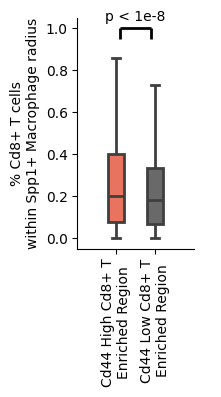

In [101]:
# 绘制左一半和右一半的violinplot，并去除Box
plt.figure(figsize=(1.5, 3))
# sns.violinplot(data=proportion_df, y='length', hue='type', width=0.4, palette=['tomato', 'dimgray'], linewidth=2, x='type', split=False, inner=None)
sns.boxplot(data=proportion_df, y='length', hue='type', width=0.4, palette=['tomato', 'dimgray'], linewidth=2, x='type',
            fliersize=0)
plt.ylabel('% Cd8+ T cells\nwithin Spp1+ Macrophage radius')
plt.xlabel('')
plt.xticks([0, 1], ['Cd44 High Cd8+ T\nEnriched Region', 'Cd44 Low Cd8+ T\nEnriched Region'], rotation=90, ha='center', fontsize=10)
# plt.title('Proportion of CD44+ CD8T within Radius of SPP1+ Macrophage')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
sns.despine(left=False, bottom=False)

# 用白色的线标出平均值
means = proportion_df.groupby('type')['length'].mean()

# plt.plot([-0.1, 0.1], [means[0], means[0]], color='silver', linestyle='-', linewidth=2)
# plt.plot([0.9, 1.1], [means[1], means[1]], color='silver', linestyle='-', linewidth=2)

plt.vlines(0.9, 0.95, 1, color='black', linestyle='-', linewidth=2)
plt.vlines(0.1, 0.95, 1, color='black', linestyle='-', linewidth=2)
plt.hlines(1, 0.1, 0.9, color='black', linestyle='-', linewidth=2)
plt.text(0.5, 1.02, 'p < 1e-8', ha='center', va='bottom', fontsize=10)
plt.xlim(-1, 2)
# plt.ylim(-0.05, 0.5)

plt.rcParams['pdf.fonttype']=42
plt.savefig("./plots/nanostring_cd44_celltype_proportion.pdf", format="pdf", bbox_inches='tight')
plt.show()